In [11]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import gym

In [12]:
env = gym.make("CartPole-v0")
s_size = env.observation_space.shape

a_size = env.action_space.n
env.seed(0)
print(*s_size)
print(a_size)


4
2


In [13]:
class Policy():
    
    def __init__(self,s_size = 4, a_size = 2):
        
        self.w = 1e-4*np.random.rand(s_size,a_size) # initial random policy only at creating an instance of policy
        
    def forward(self,state):
        x = np.dot(state,self.w)
        return np.exp(x)/(sum(np.exp(x)))
    
    def act(self,state):
        
        probs = self.forward(state)
        #action = np.random.choice(2,p = probs)
        action = np.argmax(probs)
        return action
    
        
        
    

In [24]:
policy = Policy()

def hill(n_episodes = 1000, max_t = 1000, noise_level = 1e-3, print_every = 100, gamma = 1.0):
    
    scores_deque = deque(maxlen= 100)
    scores = []
    best_w = policy.w
    best_R = -np.Inf
    for i_episodes in range(1,n_episodes+1):
        
        state = env.reset()
        rewards = []
        for t in range(max_t):
            action = policy.act(state)
            state, reward, done,_ = env.step(action)
            
            rewards.append(reward)
            if done:
                break
        scores.append(sum(rewards))
        scores_deque.append(sum(rewards))
            
        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(rewards,discounts)])
            
        if R >= best_R:
            best_R = R
            best_w = policy.w
            noise_level = max(1e-3, noise_level/2)
            policy.w += noise_level * np.random.rand(*policy.w.shape)
                
        else:
                
            noise_level = min(2, noise_level * 2)
            policy.w = best_w + noise_level * np.random.rand(*policy.w.shape)
        
        if i_episodes % print_every == 0:
            print('Episodes: {}\t Average score: {}'.format(i_episodes,np.mean(scores_deque)))
            
        if np.mean(scores_deque) >=195.0:
            print('Environment solved in {} episodes with average score :{}'.format((i_episodes-100),np.mean(scores_deque)))
            policy.w = best_w                        ## i-100 is done above bcs, we want how many episodes it took
            break                                   ## after fresh start from 1 after previous 100 epsisodes                      
        
    return scores
                
            
            
            
    
    
    
    

In [25]:
scores = hill()

Episodes: 100	 Average score: 176.29
Environment solved in 13 episodes with average score :196.16


<function matplotlib.pyplot.show(*args, **kw)>

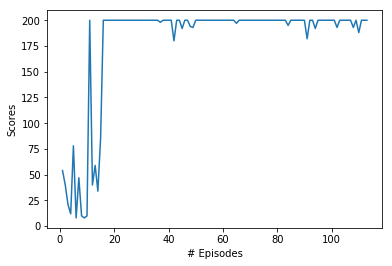

In [32]:
## plot

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1,len(scores)+1), (scores))
plt.xlabel("# Episodes")
plt.ylabel("Scores")
plt.show

In [ ]:
env = gym.make('CartPole-v0')
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for t in range(200):
    action = policy.act(state)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()